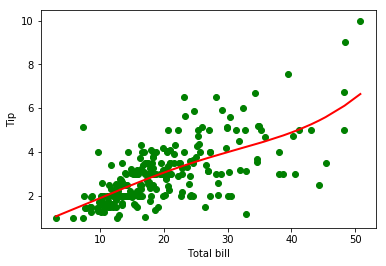

In [47]:
%matplotlib inline

from numpy import *
import matplotlib.pyplot as plt
import pandas as pd
#import operator
#from os import listdir
#import matplotlib
#import numpy.linalg 
#from scipy.stats.stats import pearsonr
 
def kernel(point,xmat, k):
    m,n = shape(xmat)
    weights = mat(eye((m)))
    #print(weights)
#     print(eye(m))
    for j in range(m):
        diff = point - X[j]
        weights[j,j] = exp(diff*diff.T/(-2.0*k**2))
    return weights
 
def localWeight(point,xmat,ymat,k):
    wei = kernel(point,xmat,k)
    W = (X.T*(wei*X)).I*(X.T*(wei*ymat.T))
#     print(W)
    return W
     
def localWeightRegression(xmat,ymat,k):
    m,n = shape(xmat)
#     print(shape(xmat))
    ypred = zeros(m)
#     print(ypred)
    for i in range(m):
        ypred[i] = xmat[i]*localWeight(xmat[i],xmat,ymat,k)
    return ypred
     
# def basicRegression(X,mtip):
#     #according to equation
#     W = (X.T*X).I*(X.T*mtip.T)
#     return W
     
# load data points
data = pd.read_csv('tips.csv')
bill = array(data.total_bill)
tip = array(data.tip)

# print(bill)
# print(tip)
 
#preparing and add 1 in bill
mbill = mat(bill)
mtip = mat(tip)
# print(mbill)
# print(mtip)
#count no of mbill OR it gives (no.of rows, no.of col)
m= shape(mbill)[1]
# print(shape(mbill)[0])
#create 1D matrix
one = mat(ones(m))
# print(ones)
#T makes stack type or 1D 1 element matrix. ie:[[1].....]
# print((one.T).T)
#Here ([one,mbill]) of 1D type is created
X= hstack((one.T,mbill.T))
# print(X)

 
#set k here
ypred = localWeightRegression(X,mtip,10)
#most complex
#sorting and return sorted INDEX --argsort
# print(X[:,0].argsort(0))
SortIndex = X[:,1].argsort(0)
#print(X[:,1])
xsort = X[SortIndex][:,0]
# print(xsort)
     
fig = plt.figure()
ax = fig.add_subplot(1,1,1)
ax.scatter(bill,tip, color='green')
ax.plot(xsort[:,1],ypred[SortIndex], color = 'red', linewidth=2)
plt.xlabel('Total bill')
plt.ylabel('Tip')
plt.show();